**This notebook demonstrates advanced gates**
$$
   \newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}
   \newcommand{\ket}[1]{\left|{#1}\right\rangle}
   \newcommand{\bra}[1]{\left\langle{#1}\right|}
$$

The $H$, $S$, $S^\dagger$, $T$ and $T^\dagger$ gates are constructed from the general unitary:
$$
U(\theta, \phi, \lambda) = 
\begin{pmatrix}
\cos\left(\theta/2\right) & -e^{i\lambda} \sin(\theta/2) \\
e^{i\phi} \sin(\theta/2) & e^{i\lambda + i\phi} \cos(\theta/2)
\end{pmatrix}
$$

The general unitary can be used to create an arbitrary single-qubit state:
$$
\begin{align}
\ket{\psi} &= U \ket{0} \\
&= \cos(\theta/2)\ket{0} + \sin(\theta/2)e^{i\phi}\ket{1} 
\end{align}
$$

Various choices of $\theta, \phi, \lambda$ lead to three general purpose gates:

1. Phase change:
$$
u1(\lambda) = U(0,0,\lambda) = 
\begin{pmatrix}
1 & 0 \\
0 & e^{i\lambda}
\end{pmatrix}
$$

2. Phase rotation:
$$
u2(\phi, \lambda) = U(\pi/2,\phi,\lambda) = 
\begin{pmatrix}
1 & -e^{i\lambda} \\
e^{i\phi} & e^{i\lambda + i\phi}
\end{pmatrix}
$$

3. General unitary
$$
u3(\theta, \phi, \lambda) = U(\theta, \phi, \lambda)
$$

***
*Example: apply a $\pi/2$ phase rotation to $\ket{\circlearrowright}$*
$$
\begin{array}{cc}
u1(\pi/2) = 
\begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}, \;and \;\;&
\ket{\circlearrowright} &=& \frac{1}{\sqrt{2}}\left(\ket{0} + i\ket{1}\right)
\end{array}
$$
In the standard basis:
$$
\begin{align}
U(0,0,\pi/2)\ket{\circlearrowright} &= \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 0 \\
0 & i
\end{pmatrix}
\begin{pmatrix}
1\\
i
\end{pmatrix}
\\
&=
\frac{1}{\sqrt{2}}
\begin{pmatrix}
1\\
-1
\end{pmatrix}
\\
&=
\ket{-}
\end{align}
$$

In [4]:
import os, sys
from qiskit import *
from qiskit.compiler import transpile, assemble
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.tools.visualization import plot_histogram
import numpy as np

# Import local tools
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import backend_tools

# Get a backend
IBMQ.load_accounts()
simulator = backend_tools.get_device(use_sim=True, min_qubits=5)

/home/sjeffrey/anaconda3/envs/Qiskit_Env/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqprovider.py:272: UserWarning: Credentials are already in use.
  warnings.warn('Credentials are already in use.')


*Example: create a set of states with differing phases*

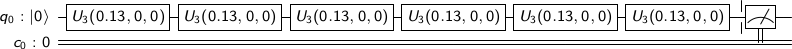

In [10]:
# Define the quantum circuit
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(q, c)

# Build the circuits
circuits = []
middle = QuantumCircuit(q, c)
meas = QuantumCircuit(q, c)
meas.barrier()
meas.measure(q, c)
exp_vector = range(0,50)
exp_theta = []
theta = 0.0
for exp_index in exp_vector:
    delta_theta = 2*np.pi/len(exp_vector)
    theta = theta + delta_theta
    exp_theta.append(theta)
    middle.u3(delta_theta,0,0,q)
    circuits.append(middle + meas)
    
# Draw a selection of the circuits
#DOESN"T WORK: import matplotlib.pyplot as plt
#DOESN"T WORK: %matplotlib inline
#DOESN"T WORK: #for exp_index in range(0,1):
#DOESN"T WORK:     #print("Experiment: {}".format(exp_index))
#DOESN"T WORK:     #print("Type: {} len {}".format(type()))
#DOESN"T WORK: #    circuits[exp_index].draw(output="mpl")
#DOESN"T WORK: plt.subplots(3, 1)
#DOESN"T WORK: circuits[0].draw(output="mpl")
#DOESN"T WORK: #plt.show()
#DOESN"T WORK: #plt.subplot(3, 1, 2)
#DOESN"T WORK: circuits[0].draw(output="mpl")
#DOESN"T WORK: #plt.subplot(3, 1, 3)
#DOESN"T WORK: circuits[0].draw(output="mpl")
#DOESN"T WORK: #plt.show()

# Draw one of the circuits
%matplotlib inline
# Style only works in matplotlib backend
style = {'backgroundcolor': 'lightgreen'}
#circuits[5].draw(output='mpl', plot_barriers=True, reverse_bits=True, style=style, scale=0.6)
circuits[5].draw(output='latex', plot_barriers=True, reverse_bits=True, scale=0.3)


In the example below, we use the variability of the sample proportion to show error bars:
$$
\sigma = \sqrt{\frac{P*(1-P)}{n}} 
$$
See the [description here.](https://stattrek.com/estimation/confidence-interval-proportion.aspx?tutorial=)

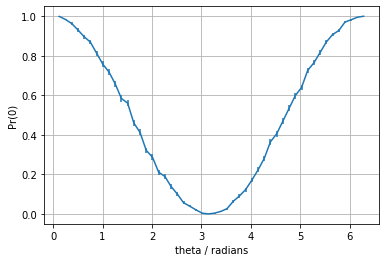

In [3]:
# Simulate or run the circuit
shots = 1024
job = execute(circuits, backend=simulator, shots=shots, seed_simulator=8)
result = job.result()

# Plot the result
import matplotlib.pyplot as plt
exp_data = []
exp_error = []
for exp_index in exp_vector:
    data = result.get_counts(circuits[exp_index])
    try:
        p0 = data['0']/shots
    except KeyError:
        p0 = 0
    exp_data.append(p0)
    exp_error.append(np.sqrt(p0*(1-p0)/shots))

plt.errorbar(exp_theta, exp_data, exp_error)
plt.xlabel('theta / radians')
plt.ylabel('Pr(0)')
plt.grid(True)
plt.show()